# Reference Code 

#### https://youtu.be/IuoEiemAuIY
#### https://github.com/bnsreenu/python_for_microscopists/blob/master/158b_transfer_learning_using_CNN_weights_VGG16_RF.py

With reference to the code by: Sreenivas Bhattiprolu

This code explains the process of using pretrained weights (VGG16) 
as feature extractors for traditional machine learning classifiers.

### VGG-16 + ML methods - Raw Images (Img 224 x 224 x 3)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from skimage.color import gray2rgb

SIZE = 224  #Resize images

# Extract the training images and labels 
data = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/A/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/A')]
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/LL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/LL')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/RL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/RL')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/TA/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/TA')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/W/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Train/W')])

train_images = []
for x in range(len(data)):
    img = cv2.imread(data[x],0)
    test = gray2rgb(img)
    test = cv2.resize(test, (224,224), interpolation = cv2.INTER_AREA)
    train_images.append(test)
    
train_labels = []
train_labels.extend('A' for i in range(637))
train_labels.extend('LL' for i in range(627))
train_labels.extend('RL' for i in range(660))
train_labels.extend('TA' for i in range(645))
train_labels.extend('W' for i in range(630))   

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Extract the test images and labels 
datat = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/A/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/A')]
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/LL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/LL')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/RL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/RL')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/TA/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/TA')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/W/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Training - Raw/Test/W')])

test_images = []
for x in range(len(datat)):
    img = cv2.imread(datat[x],0)
    test = gray2rgb(img)
    test = cv2.resize(test, (224,224), interpolation = cv2.INTER_AREA)
    test_images.append(test)
    
test_labels = []
test_labels.extend('A' for i in range(164))
test_labels.extend('LL' for i in range(171))
test_labels.extend('RL' for i in range(141))
test_labels.extend('TA' for i in range(155))
test_labels.extend('W' for i in range(169))    

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [2]:
# One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [3]:
#############################
# Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

# Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False
    
VGG_model.summary()  # Trainable parameters will be 0


# Now, let us use features from convolutional network for the ML methods 
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to the ML methods 


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Accuracy =  0.72875


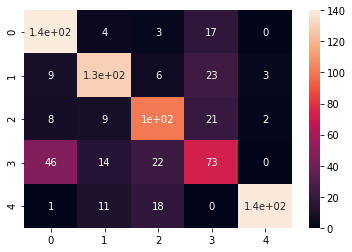

In [4]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

# Train the model on training data
RF_model.fit(X_for_RF, y_train) # For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVM
SVM_model = svm.SVC()

# Train the model on training data
SVM_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained SVM model. 
prediction_RF = SVM_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
# KNN 
KNN_model = KNeighborsClassifier()

# Train the model on training data
KNN_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained KNN model. 
prediction_RF = KNN_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

In [ ]:
# LR
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
LR_model = LogisticRegression(C=1, max_iter=3000)

# Train the model on training data
LR_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained LR model. 
prediction_RF = LR_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

C:\Users\leona\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.76875


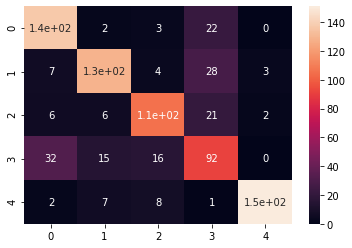

In [5]:
# XGBOOST
import xgboost as xgb
# XG_model = xgb.XGBClassifier()
XG_model = xgb.XGBClassifier()
XG_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained XGB model. 
prediction_RF = XG_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)


### VGG-16 + ML methods - PCA & Preprocessed Images (Img 224 x 224 x 3)

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from skimage.color import gray2rgb

SIZE = 224  #Resize images

# Extract the training images and labels 
data = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/A/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/A')]
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/LL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/LL')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/RL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/RL')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/TA/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/TA')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/W/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/W')])

train_images = []
for x in range(len(data)):
    img = cv2.imread(data[x],0)
    test = gray2rgb(img)
    test = cv2.resize(test, (224,224), interpolation = cv2.INTER_AREA)
    train_images.append(test)
    
train_labels = []
train_labels.extend('A' for i in range(637))
train_labels.extend('LL' for i in range(627))
train_labels.extend('RL' for i in range(660))
train_labels.extend('TA' for i in range(645))
train_labels.extend('W' for i in range(630))   

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Extract the test images and labels 
datat = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/A/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/A')]
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/LL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/LL')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/RL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/RL')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/TA/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/TA')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/W/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/W')])

test_images = []
for x in range(len(datat)):
    img = cv2.imread(datat[x],0)
    test = gray2rgb(img)
    test = cv2.resize(test, (224,224), interpolation = cv2.INTER_AREA)
    test_images.append(test)
    
test_labels = []
test_labels.extend('A' for i in range(164))
test_labels.extend('LL' for i in range(171))
test_labels.extend('RL' for i in range(141))
test_labels.extend('TA' for i in range(155))
test_labels.extend('W' for i in range(169))    

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [39]:
# One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [40]:
#############################
# Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

# Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False
    
VGG_model.summary()  # Trainable parameters will be 0


# Now, let us use features from convolutional network for the ML methods 
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to the ML methods 


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Accuracy =  0.8225


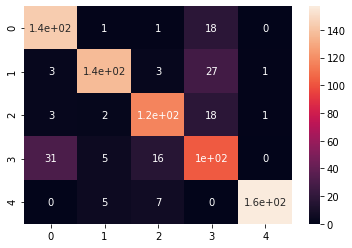

In [9]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

# Train the model on training data
RF_model.fit(X_for_RF, y_train) # For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.79625


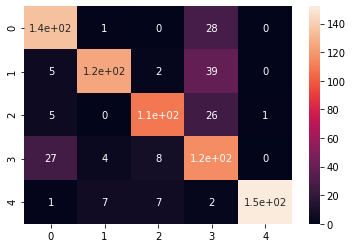

In [41]:
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVM
SVM_model = svm.SVC()

# Train the model on training data
SVM_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained SVM model. 
prediction_RF = SVM_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.69875


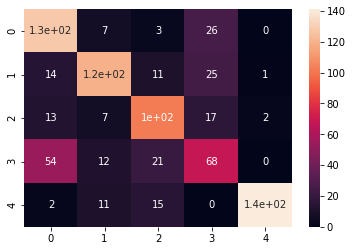

In [42]:
# KNN 
KNN_model = KNeighborsClassifier()

# Train the model on training data
KNN_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained KNN model. 
prediction_RF = KNN_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.8475


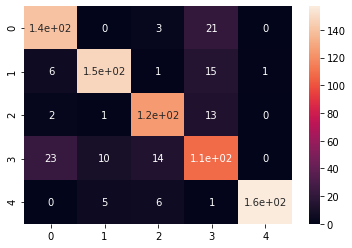

In [43]:
# LR
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
LR_model = LogisticRegression(C=1, max_iter=3000)

# Train the model on training data
LR_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained LR model. 
prediction_RF = LR_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

C:\Users\leona\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.8375


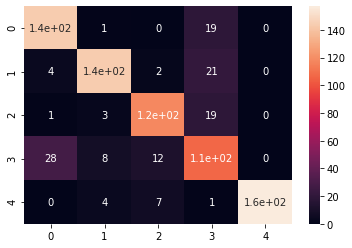

In [10]:
# XGBOOST
import xgboost as xgb
# XG_model = xgb.XGBClassifier()
XG_model = xgb.XGBClassifier()
XG_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained XGB model. 
prediction_RF = XG_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)


### VGG-16 + ML methods - PCA & Preprocessed Images (Img 256 x 256 x 3)

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16
from skimage.color import gray2rgb

SIZE = 256  #Resize images

# Extract the training images and labels 
data = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/A/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/A')]
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/LL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/LL')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/RL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/RL')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/TA/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/TA')])
data.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/W/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Train/W')])

train_images = []
for x in range(len(data)):
    img = cv2.imread(data[x],0)
    test = gray2rgb(img)
    test = cv2.resize(test, (256,256), interpolation = cv2.INTER_AREA)
    train_images.append(test)
    
train_labels = []
train_labels.extend('A' for i in range(637))
train_labels.extend('LL' for i in range(627))
train_labels.extend('RL' for i in range(660))
train_labels.extend('TA' for i in range(645))
train_labels.extend('W' for i in range(630))   

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

# Extract the test images and labels 
datat = ['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/A/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/A')]
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/LL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/LL')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/RL/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/RL')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/TA/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/TA')])
datat.extend(['C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/W/' + s for s in os.listdir('C:/Users/leona/OneDrive/DSA4199/NIST-Classification/PCA - Preprocessed/Test/W')])

test_images = []
for x in range(len(datat)):
    img = cv2.imread(datat[x],0)
    test = gray2rgb(img)
    test = cv2.resize(test, (256,256), interpolation = cv2.INTER_AREA)
    test_images.append(test)
    
test_labels = []
test_labels.extend('A' for i in range(164))
test_labels.extend('LL' for i in range(171))
test_labels.extend('RL' for i in range(141))
test_labels.extend('TA' for i in range(155))
test_labels.extend('W' for i in range(169))    

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [12]:
# One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
#############################
# Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

# Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False
    
VGG_model.summary()  # Trainable parameters will be 0


# Now, let us use features from convolutional network for the ML methods 
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to the ML methods 


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

Accuracy =  0.82875


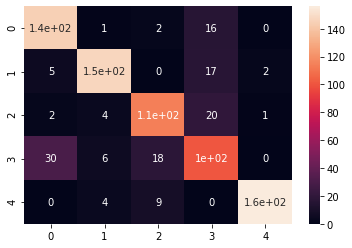

In [14]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()

# Train the model on training data
RF_model.fit(X_for_RF, y_train) # For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.7925


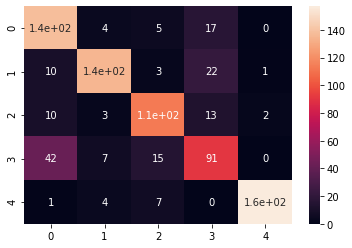

In [15]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(max_features=10)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) # For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.77


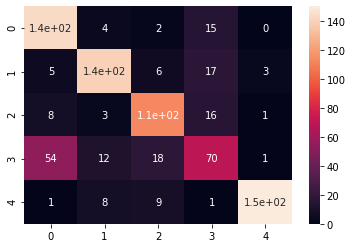

In [16]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) # For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.83375


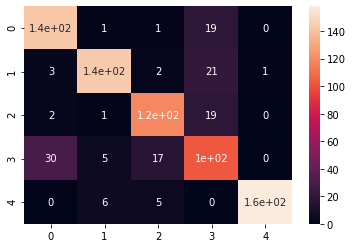

In [8]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 1000)

# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

In [11]:
import pandas as pd
results=pd.DataFrame({"Predictions":prediction_RF})

In [12]:
results.to_csv("C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Model-Training/machine_learning/Results/Model-Training-Raw-RF1000.csv",index=False)

In [ ]:
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVM
SVM_model = svm.SVC()

# Train the model on training data
SVM_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained SVM model. 
prediction_RF = SVM_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.85125


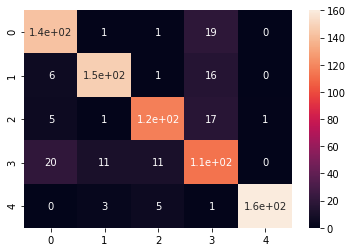

In [17]:
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVM
SVM_model = svm.SVC(kernel='linear')

# Train the model on training data
SVM_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained SVM model. 
prediction_RF = SVM_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.81875


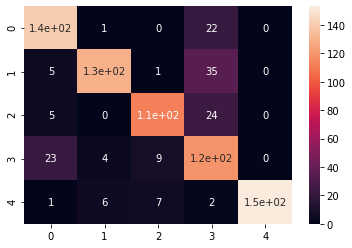

In [18]:
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVM
SVM_model = svm.SVC(kernel='poly')

# Train the model on training data
SVM_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained SVM model. 
prediction_RF = SVM_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.85125


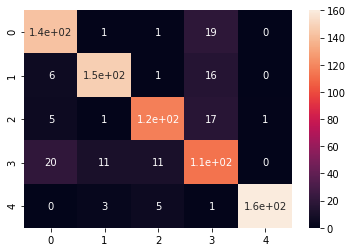

In [19]:
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVM
SVM_model = svm.SVC(kernel='linear', C=0.1)

# Train the model on training data
SVM_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained SVM model. 
prediction_RF = SVM_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.85125


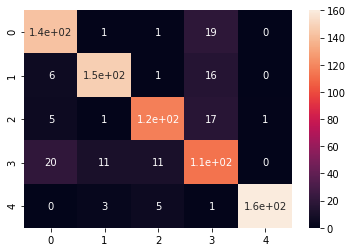

In [20]:
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# SVM
SVM_model = svm.SVC(kernel='linear', C=10)

# Train the model on training data
SVM_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained SVM model. 
prediction_RF = SVM_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

In [51]:
import pandas as pd
results=pd.DataFrame({"Predictions":prediction_RF})
results.to_csv("C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Model-Training-Raw-SVM.csv",index=False)

Accuracy =  0.72625


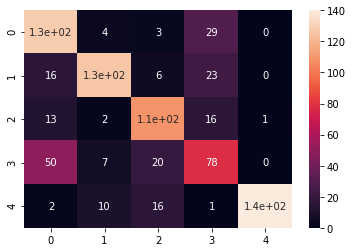

In [23]:
# KNN 
KNN_model = KNeighborsClassifier()

# Train the model on training data
KNN_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained KNN model. 
prediction_RF = KNN_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.67875


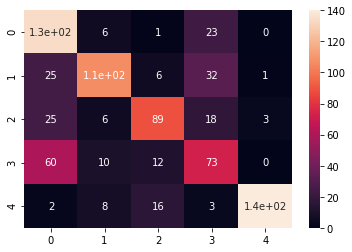

In [21]:
# KNN 
KNN_model = KNeighborsClassifier(n_neighbors = 3)

# Train the model on training data
KNN_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained KNN model. 
prediction_RF = KNN_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.72875


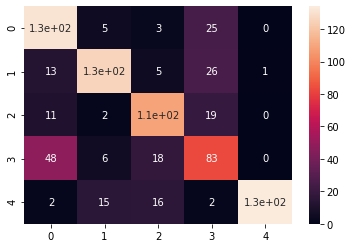

In [22]:
# KNN 
KNN_model = KNeighborsClassifier(n_neighbors = 7)

# Train the model on training data
KNN_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained KNN model. 
prediction_RF = KNN_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.75375


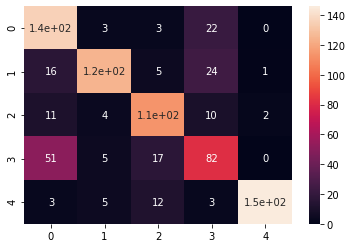

In [24]:
# KNN 
KNN_model = KNeighborsClassifier(n_neighbors = 7, p = 1)

# Train the model on training data
KNN_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained KNN model. 
prediction_RF = KNN_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.71875


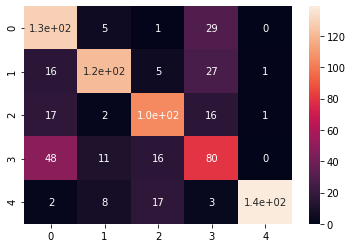

In [25]:
# KNN 
KNN_model = KNeighborsClassifier(n_neighbors = 7, p = 3)

# Train the model on training data
KNN_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained KNN model. 
prediction_RF = KNN_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

In [53]:
import pandas as pd
results=pd.DataFrame({"Predictions":prediction_RF})
results.to_csv("C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Model-Training-Raw-KNN.csv",index=False)

Accuracy =  0.85375


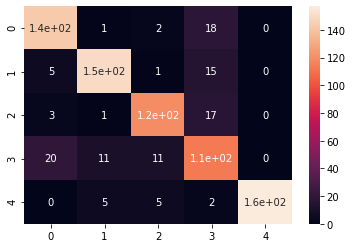

In [79]:
# LR
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
LR_model = LogisticRegression(C=1, max_iter=3000)

# Train the model on training data
LR_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained LR model. 
prediction_RF = LR_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

C:\Users\leona\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\leona\anaconda3\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Accuracy =  0.85375


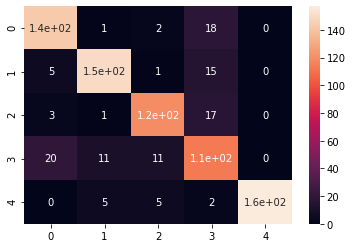

In [26]:
# LR
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
LR_model = LogisticRegression(C=1, solver = 'newton-cg', max_iter=3000)

# Train the model on training data
LR_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained LR model. 
prediction_RF = LR_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.85375


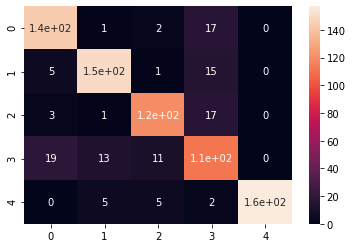

In [27]:
# LR
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
LR_model = LogisticRegression(C=1, solver = 'sag', max_iter=3000)

# Train the model on training data
LR_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained LR model. 
prediction_RF = LR_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.855


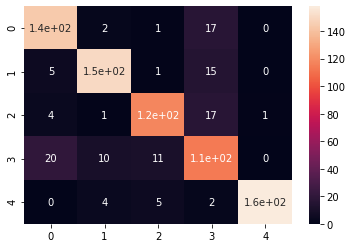

In [28]:
# LR
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
LR_model = LogisticRegression(C=0.1, max_iter=3000)

# Train the model on training data
LR_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained LR model. 
prediction_RF = LR_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

Accuracy =  0.8525


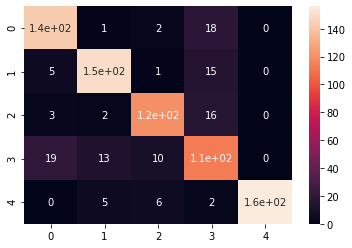

In [29]:
# LR
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
LR_model = LogisticRegression(C=10, max_iter=3000)

# Train the model on training data
LR_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained LR model. 
prediction_RF = LR_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)

In [80]:
import pandas as pd
results=pd.DataFrame({"Predictions":prediction_RF})
results.to_csv("C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Model-PCA-Preprocessed-LR.csv",index=False)

[14:40:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.8575


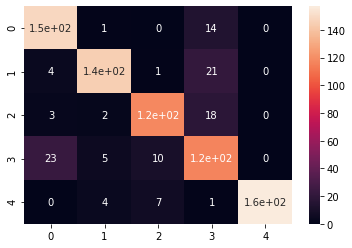

In [35]:
# XGBOOST
import xgboost as xgb
# XG_model = xgb.XGBClassifier()
XG_model = xgb.XGBClassifier()
XG_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained XGB model. 
prediction_RF = XG_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)


[13:04:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.84375


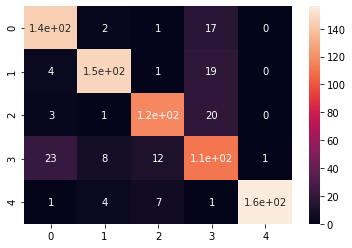

In [31]:
# XGBOOST
import xgboost as xgb
# XG_model = xgb.XGBClassifier()
XG_model = xgb.XGBClassifier(learning_rate=0.05)
XG_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained XGB model. 
prediction_RF = XG_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)


[13:27:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.81875


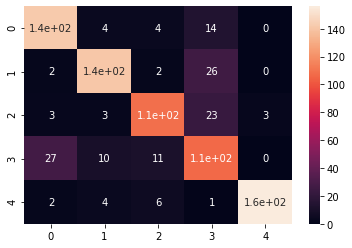

In [32]:
# XGBOOST
import xgboost as xgb
# XG_model = xgb.XGBClassifier()
XG_model = xgb.XGBClassifier(learning_rate=0.01)
XG_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained XGB model. 
prediction_RF = XG_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)


[13:54:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.8225


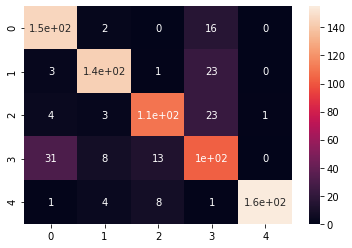

In [33]:
# XGBOOST
import xgboost as xgb
# XG_model = xgb.XGBClassifier()
XG_model = xgb.XGBClassifier(n_estimators=10)
XG_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained XGB model. 
prediction_RF = XG_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)


[14:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy =  0.85625


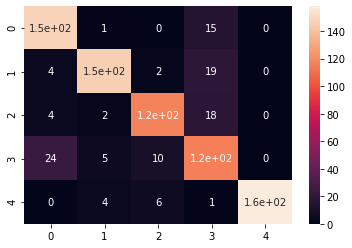

In [34]:
# XGBOOST
import xgboost as xgb
# XG_model = xgb.XGBClassifier()
XG_model = xgb.XGBClassifier(n_estimators=1000)
XG_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

# Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

# Now predict using the trained XGB model. 
prediction_RF = XG_model.predict(X_test_features)
# Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

# Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

# Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
# print(cm)
sns.heatmap(cm, annot=True)


In [36]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
# save the model to disk
filename = 'xgb_pca_preprocessed_model2.sav'
pickle.dump(XG_model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [37]:
import pandas as pd
results=pd.DataFrame({"Predictions":prediction_RF})
results.to_csv("C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Model-PCA-Preprocessed-XGB2.csv",index=False)

In [5]:
import pandas as pd
results=pd.DataFrame({"Predictions":prediction_RF})
results.to_csv("C:/Users/leona/OneDrive/DSA4199/NIST-Classification/Model-PCA-Preprocessed-XGBtune2.csv",index=False)